In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"E:\FULL STACK DATA SCIENCE & AI\Internship projects\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#Dropping duplicate values
data=data.drop_duplicates()


In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Checking for 0 value 

print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


In [13]:
data['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [14]:
# 8. Checking for 0 value and replacing it by using mean and median

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

<Axes: xlabel='Outcome', ylabel='count'>

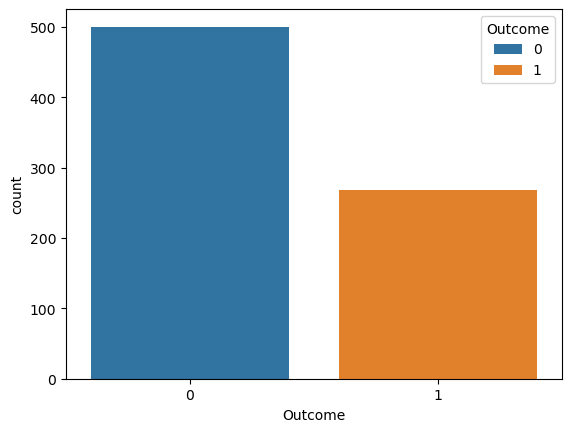

In [15]:
sns.countplot(x='Outcome', data=data,hue='Outcome')

In [16]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

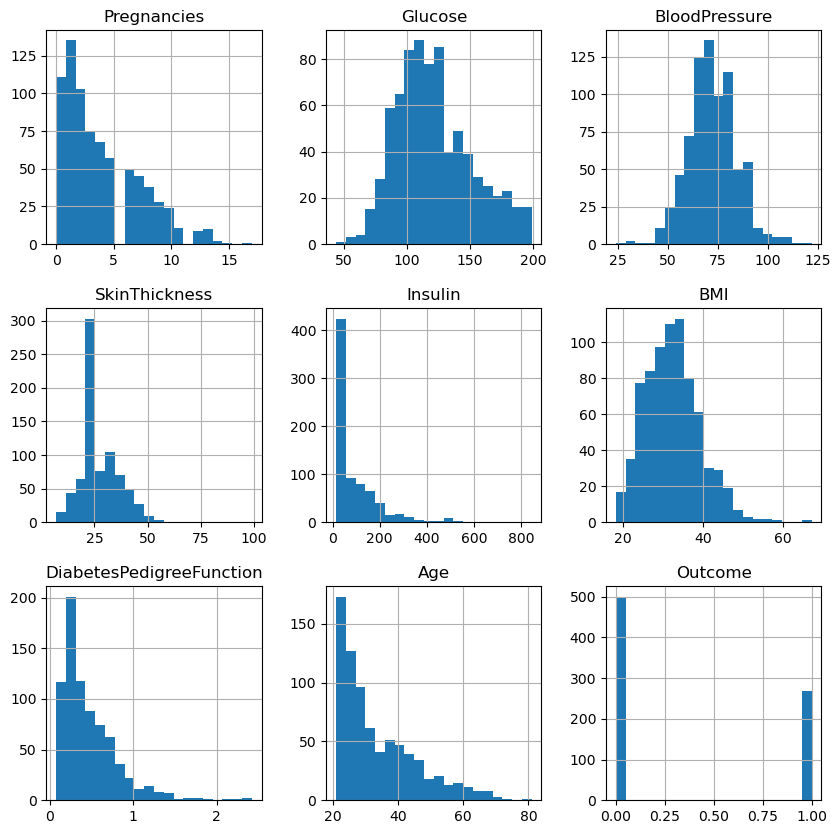

In [17]:
#histogram for each  feature
data.hist(bins=20,figsize=(10,10))
plt.show()

<Axes: ylabel='DiabetesPedigreeFunction'>

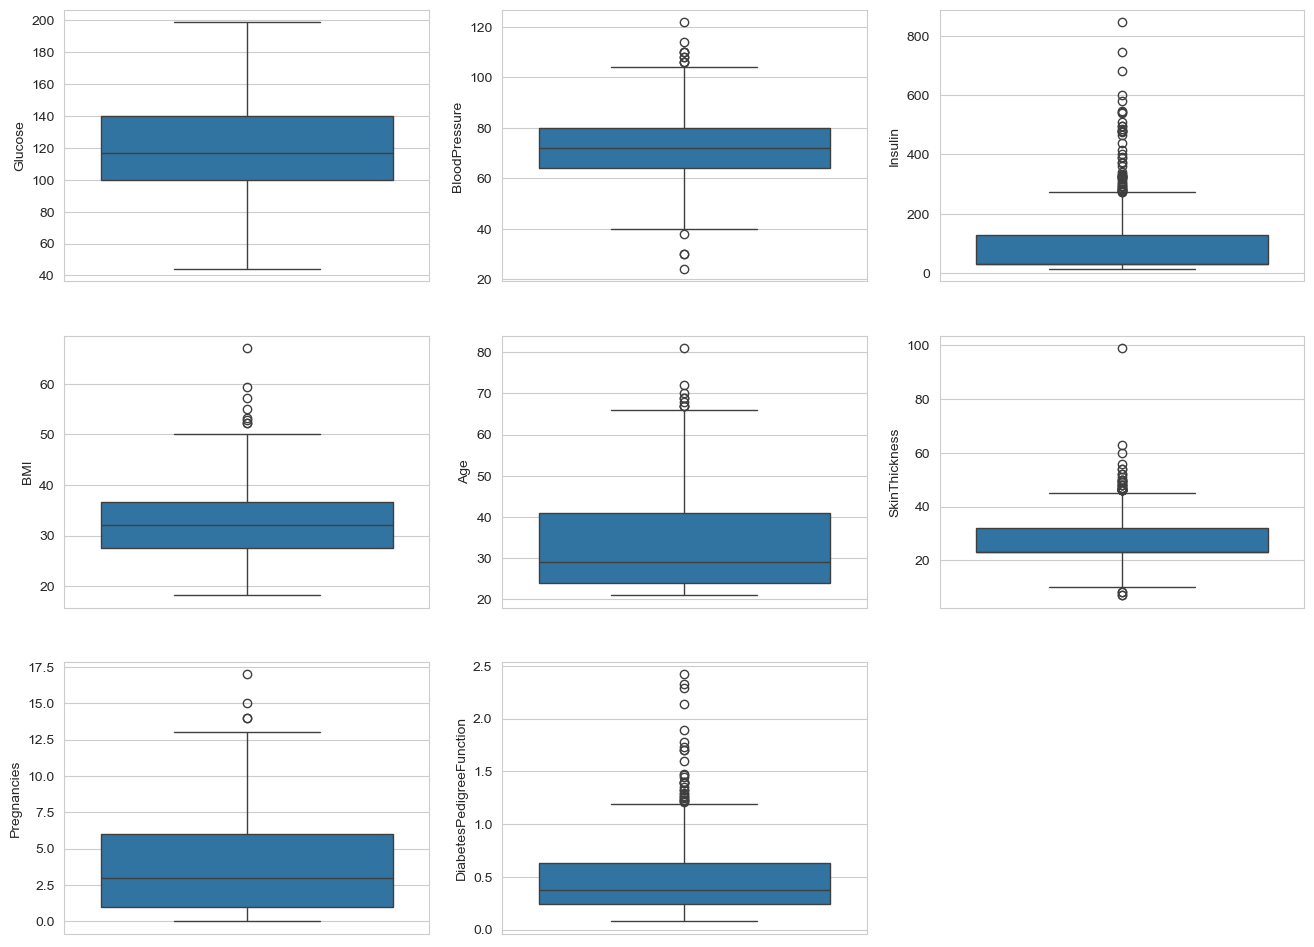

In [18]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(y='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(y='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(y='Insulin',data=data)
plt.subplot(3,3,4)
sns.boxplot(y='BMI',data=data)
plt.subplot(3,3,5)
sns.boxplot(y='Age',data=data)
plt.subplot(3,3,6)
sns.boxplot(y='SkinThickness',data=data)
plt.subplot(3,3,7)
sns.boxplot(y='Pregnancies',data=data)
plt.subplot(3,3,8)
sns.boxplot(y='DiabetesPedigreeFunction',data=data)

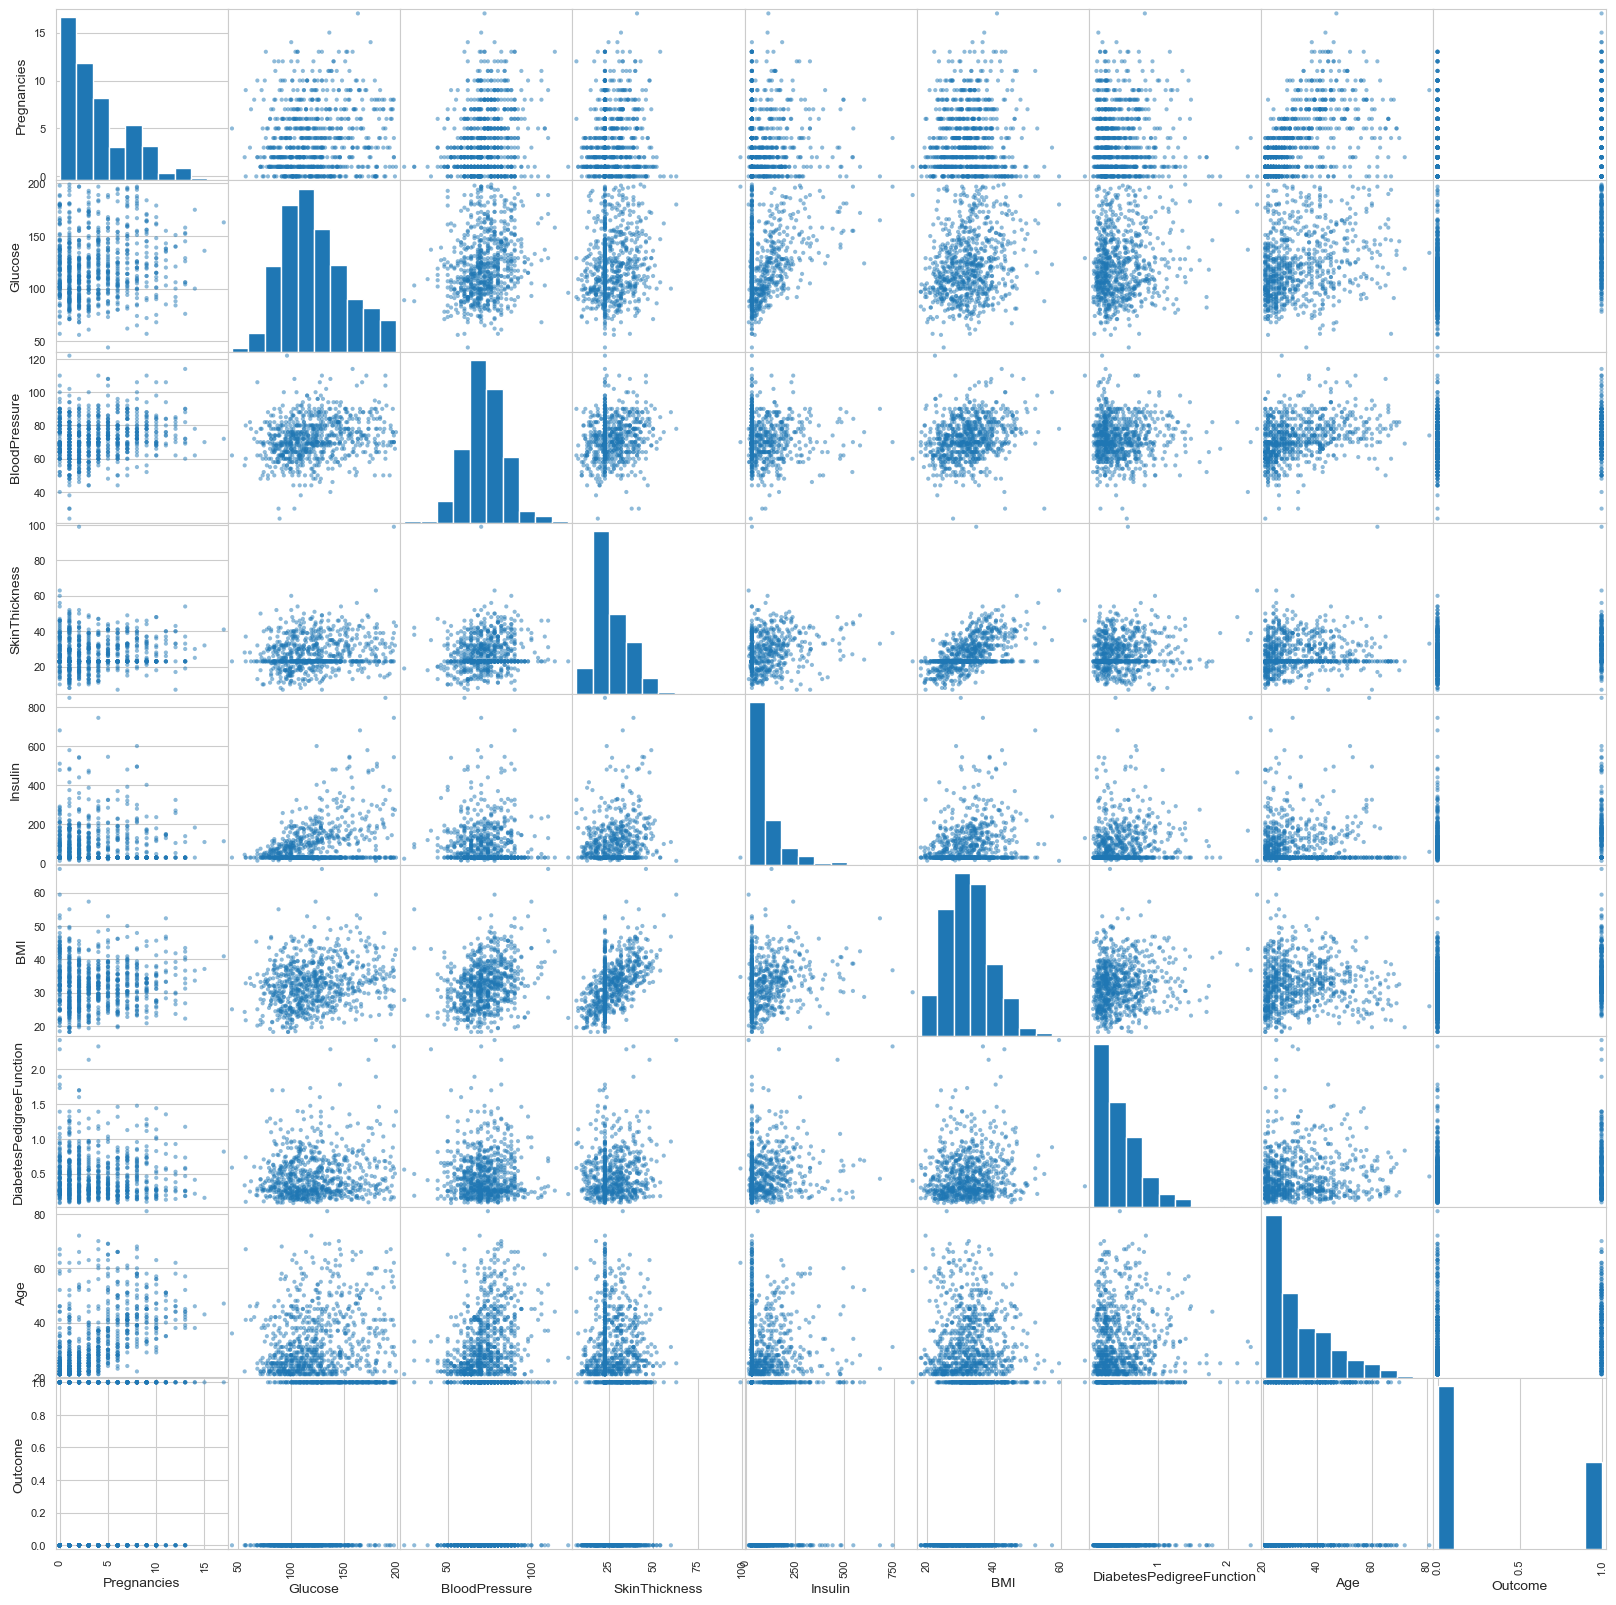

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));

<Axes: >

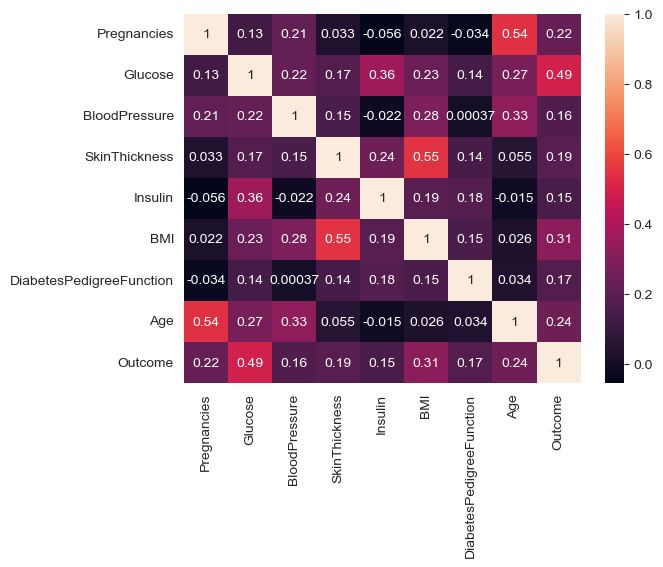

In [20]:
corrmat=data.corr()
sns.heatmap(corrmat,annot=True)

In [21]:
data_selected=data.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [22]:
data_selected.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1


In [23]:
#handling outliers
from sklearn.preprocessing import QuantileTransformer
x=data_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=quantile.transform(X)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
data_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: ylabel='SkinThickness'>

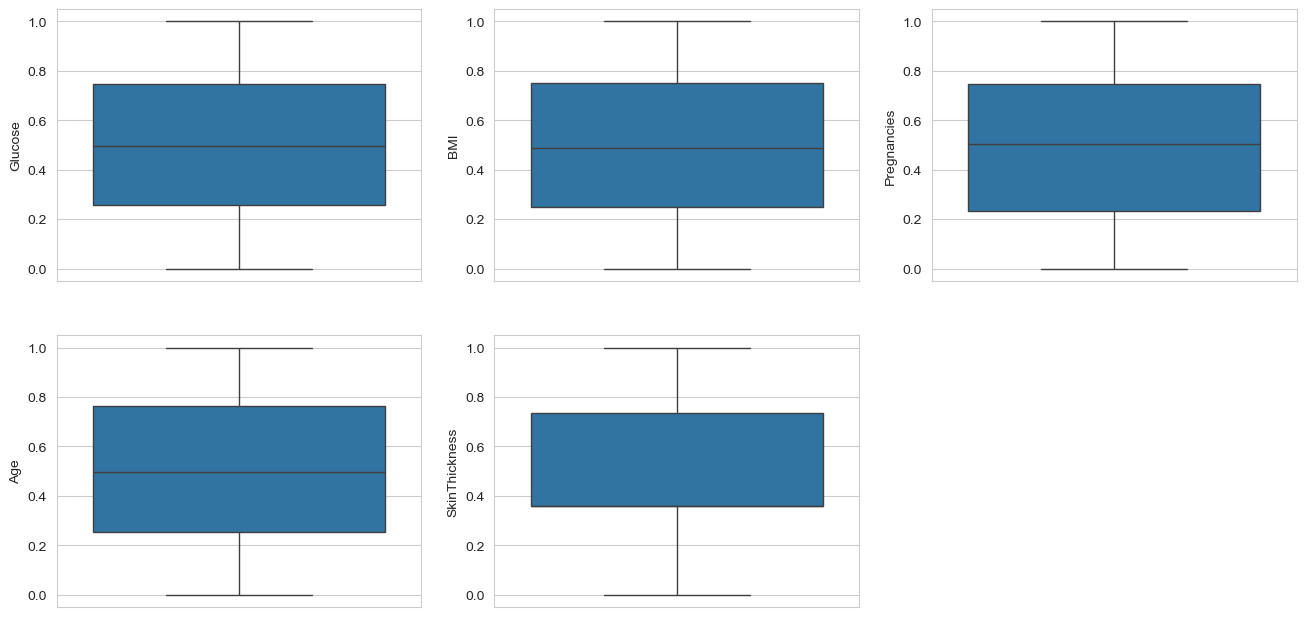

In [24]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(y=data_new['Glucose'],data=data_new)
plt.subplot(3,3,2)
sns.boxplot(y=data_new['BMI'],data=data_new)
plt.subplot(3,3,3)
sns.boxplot(y=data_new['Pregnancies'],data=data_new)
plt.subplot(3,3,4)
sns.boxplot(y=data_new['Age'],data=data_new)
plt.subplot(3,3,5)
sns.boxplot(y=data_new['SkinThickness'],data=data_new)

In [25]:
#Split the Data Frame into X and y
target_name='Outcome'
y= data_new[target_name]
X=data_new.drop(target_name,axis=1)

In [26]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [27]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [30]:
X_test.shape,y_test.shape

((154, 5), (154,))

In [31]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 5)
y_train shape: (614,)
X_test shape: (154, 5)
y_test shape: (154,)


# KNN MODEL

KNN accuracy: 0.7922077922077922
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       107
         1.0       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



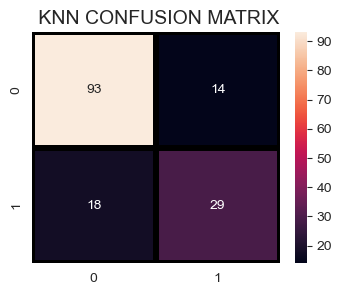

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y =knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))


from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" KNN CONFUSION MATRIX",fontsize=14)
plt.show()

# NAIVE BAYES MODEL

NAIVE BAYES accuracy is : 0.7662337662337663
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       107
         1.0       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



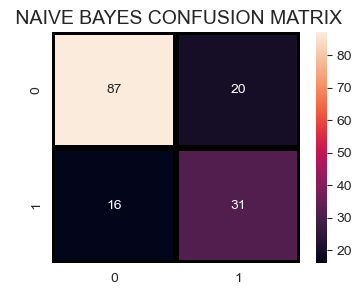

In [33]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
predictdt_y2 = NB_model.predict(X_test)
accuracy_NB2 = NB_model.score(X_test,y_test)
print("NAIVE BAYES accuracy is :",accuracy_NB2)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictdt_y2))

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictdt_y2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" NAIVE BAYES CONFUSION MATRIX",fontsize=14)
plt.show()


# SVM MODEL

SVM accuracy is : 0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       107
         1.0       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154



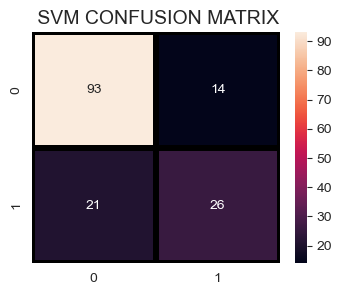

In [34]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

from sklearn.metrics import classification_report
print(classification_report(y_test, predict_y))

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" SVM CONFUSION MATRIX",fontsize=14)
plt.show()

# DECISION TREE MODEL

Decision Tree accuracy is : 0.7207792207792207
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79       107
         1.0       0.54      0.64      0.58        47

    accuracy                           0.72       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.74      0.72      0.73       154



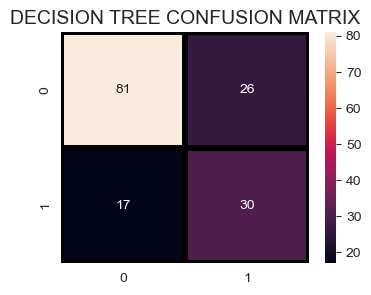

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictdt_y))

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictdt_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()


# RANDOM FOREST MODEL

RANDOM FOREST accuracy is : 0.8051948051948052
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       107
         1.0       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



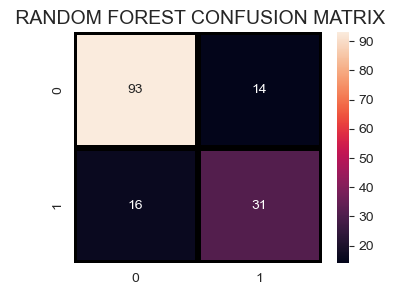

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, 
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy_rf = model_rf.score(X_test,y_test)
print("RANDOM FOREST accuracy is :",accuracy_rf)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

# LOGISTIC REGRESSION MODEL

Logistic Regression accuracy is : 0.7922077922077922
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



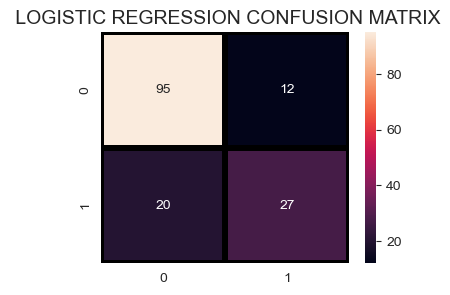

In [37]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test,lr_pred)
print(report)

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [38]:
#Save the Model
import os
os.makedirs('./saved_models', exist_ok=True)

In [39]:
import pickle
pickle.dump(model, open('./saved_models/model_01.pkl', 'wb'))

NameError: name 'model' is not defined